In [28]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import SeqIO
from Bio import AlignIO
from Bio import Seq
import os

In [60]:
def align_sequences (path_fasta) :
    input_file = path_fasta
    records = SeqIO.parse(input_file, 'fasta')
    records = list(records) # make a copy, otherwise our generator
                        # is exhausted after calculating maxlen
    maxlen = max(len(record.seq) for record in records)

    # pad sequences so that they all have the same length
    for record in records:
        if len(record.seq) != maxlen:
            sequence = str(record.seq).ljust(maxlen, '.')
            record.seq = Seq.Seq(sequence)
    assert all(len(record.seq) == maxlen for record in records)
    
    # write to temporary file and do alignment
    output_file = '{}_padded.fasta'.format(os.path.splitext(input_file)[0])
    with open(output_file, 'w') as f:
        SeqIO.write(records, f, 'fasta')
    alignment = AlignIO.read(output_file, "fasta")
    return alignment

In [11]:
for seq_record in SeqIO.parse("../data_fasta/4_.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

RLB
Seq('CKKTRWTKTGGAWGATGGTGATGTACAACCTCACCAGAGTACCAATTGGAGGGC...TAG')
430
RLB
Seq('CMTACCTCCGCCGGTTTATACTTTCACCTCYGAGGTTCCYMWWAWAAATTACCA...TTC')
426


In [61]:
sequences = ['CKKTRWTKTGGAWGATGGTGATGTACAACCTCACCAGAGTACCAATTGGAGGGCAAGTCT\
GGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAACTTGTTGCAGTTAA\
AAAGCTCGTAGTTGTATTTCAGCCTCGCGTTTTTTCCCTCTTTTTGGGTCTTTTCGCTGG\
CTTTTTTTTTACTTTGAGAAAATTAGAGTGTTTCAAGCAGACTTTTGTCTTGAATACTTC\
AGCATGGAATAATAGAGTAGGACCTTGGTTCTATTTTGTTGGTTTTGAGCCTTGGTAATG\
GTTAATAGGAACGGTTGGGGGCATTCGTATTTAACTGTCAGAGGTGAAATTCTTARACTG\
CCTGTCAGAGGTGAAATTCTTARACTGKCAGAGGTGAAATTCTTAGACTGKCAAAGGKGR\
AAATTCKTAG','CMTACCTCCGCCGGTTTATACTTTCACCTCYGAGGTTCCYMWWAWAAATTACCACCGATG\
TCCTAATCTATTATTCCCTGCTGAASTATTCYATACAAAARTGTGCTTGTAATCATCAAA\
TTTTCTCAAAGTAAAAAAAAATAATTTTCAAAAAACCCAAAAAAAGGGAAAAAACSCSAC\
GCTAAAATRSRACTACMAGCTTTTTAACTGCAMCAAGTTTAATATACGCTATTGGAGCTG\
GAATTACCGCGGCTGCTGGCACCRAACTTGCCCTCCAATTGGTACTCTGGTGAGGTTGCC\
CCTCACCCTCTTTCCAATTACAAGAYSAAMGCCCCTTATTGTTATTTATTGTCACCCCGT\
ATCTGTTAAAGGTCAACTCCTTAGACTGTCARAGGTGAAATTCTTAGACTGCCASCGGTG\
ACATTC....']

n = 430 # length of each sequence

profile_matrix = {
    'A': [0]*n,
    'C': [0]*n,
    'G': [0]*n,
    'T': [0]*n,
    'K': [0]*n,
    'R': [0]*n,
    'W': [0]*n,
    'M': [0]*n,
    'Y': [0]*n,
    'S': [0]*n,
    '.': [0]*n,
    }

for dna in sequences:
    for position, nucleotide in enumerate(dna):
        profile_matrix[nucleotide][position] += 1

In [59]:
result = [] # list to save nucleotide with max count from each "row"

for position in range(n):
    max_count = 0
    max_nucleotide = None
    for nucleotide in ['A', 'C', 'G', 'T', 'K', 'R', 'W', 'M', 'Y', 'S', '.']:
        count = profile_matrix[nucleotide][position]
        if count > max_count:
            max_count = count
            max_nucleotide = nucleotide
    result.append(max_nucleotide)

consensus = ''.join(result)
consensus

'CKTACCTCCGCAGGATGATAATGTAAAACCTCACCAGACTACCAAAAAGAACCAAAGACGGCCGAAACCAGCAGCCCCAACTCAAGCACCAAAAACAAAAATGAAACTGGAAGCAGCAAAAAAGCTCAAAGTAAAAAAAAAGAATCGCCAAAAAACCCAAAAAAAGGGAAAAAACGCTACCCTAAAATTTAACTACAAAAAATTAAACTGCATCAAGCAGAATATACGCTAGAAGACCTCAAAATACAACAACAGAGGACAACCAACGTGCCATCCAATTGGTACTCAGCCGAGGTAACCCCTAACACGAACGCCAAGGACAAGACGAATGCAACTGACAGAGATGAAATGCCAACACGGACCGGCAAAAGGGAAACTCCTAAAACGGCAAAAGGGAAAATCCTAAAACGGCAAACGGGGAAATTCKTAG'

# Phylogenetic

In [84]:
alignment = align_sequences('../data_fasta/babesia.fasta')

In [85]:
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(alignment)
print(distMatrix)

MK918504.1	0
MK918503.1	0.0003863987635239763	0
MH937338.1	0.20672333848531688	0.20710973724884085	0
MH937337.1	0.20672333848531688	0.20710973724884085	0.0011591962905718178	0
KX870100.1	0.21908809891808345	0.21947449768160743	0.134080370942813	0.13446676970633697	0
LC593280.1	0.4095826893353941	0.4095826893353941	0.43894899536321486	0.4385625965996909	0.4416537867078826	0
AB190459.1	0.9080370942812983	0.9080370942812983	0.9350850077279753	0.9346986089644513	0.9397217928902628	0.8558732612055642	0
AB241631.1	0.9281298299845441	0.9281298299845441	0.9547913446676971	0.9544049459041731	0.9598145285935085	0.884466769706337	0.6970633693972179	0
LC385886.1	0.4698608964451314	0.4698608964451314	0.4837712519319938	0.4837712519319938	0.49613601236476046	0.41344667697063364	0.8361669242658424	0.8690108191653787	0
KU361222.1	0.22024729520865538	0.22063369397217925	0.13292117465224107	0.13330757341576505	0.13292117465224107	0.4397217928902627	0.937403400309119	0.9594281298299845	0.4903400309119010

In [86]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UGMATree = constructor.upgma(distMatrix)
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

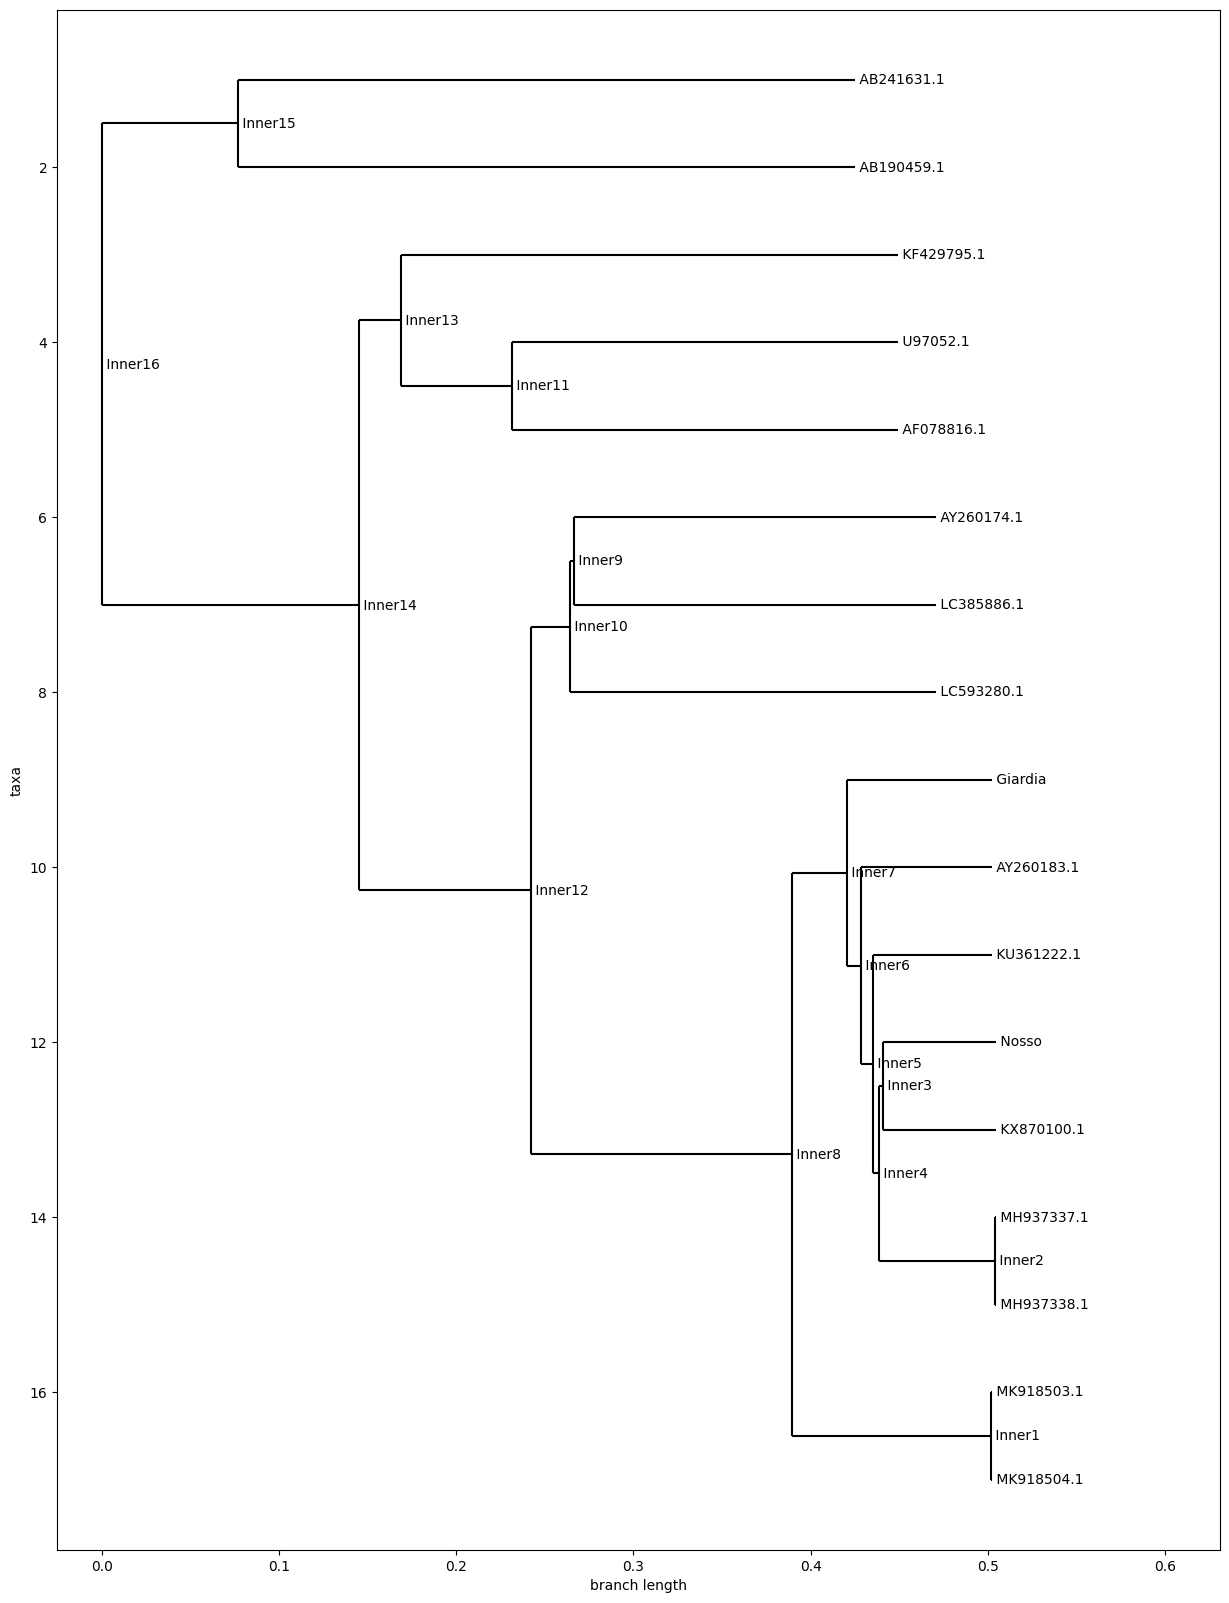

<Figure size 1000x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [88]:
fig = plt.figure(figsize=(15, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
plt.figure(figsize=(10,8))
# Draw the phlyogenetic tree
Phylo.draw(UGMATree, axes=axes)
# Draw the phlyogenetic tree using terminal
plt.savefig('teste.png', dpi=100)